In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [ ]:


import warnings
warnings.filterwarnings('ignore')

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
num_classes = len(np.unique(y_train))
category = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

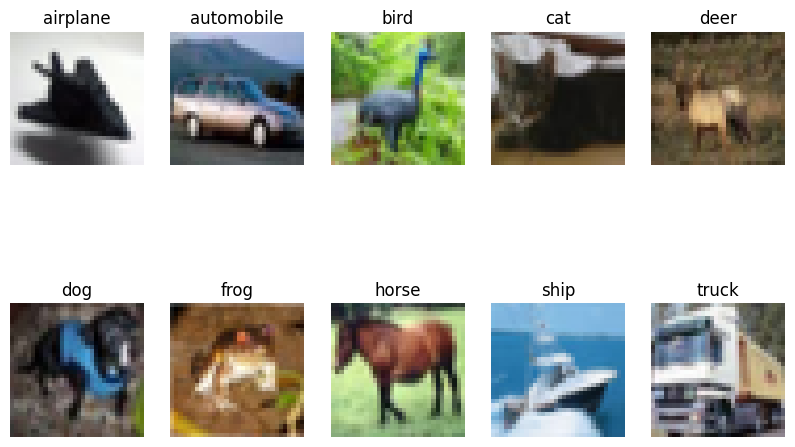

In [ ]:
#plotting the image of every class
plt.figure(figsize = (10,10))
for i in range (num_classes):
    axs = plt.subplot(3, 5, i+1)
    idx = np.where(y_train[:]==i)[0]
    x = X_train[idx,::]
    plt.imshow(x[0])
    axs.set_title(category[i])
    plt.axis("off")

In [ ]:
# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Onehot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#Defining the model
model = Sequential([
    layers.Conv2D(32, (3,3), input_shape = X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#Compiling the model using various matrices
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
seed =21
np.random.seed(seed)
epochs =10
batch_size = 32
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.4437 - accuracy: 0.4775 - val_loss: 1.1837 - val_accuracy: 0.5780
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0593 - accuracy: 0.6267 - val_loss: 0.9619 - val_accuracy: 0.6601
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8966 - accuracy: 0.6835 - val_loss: 0.8536 - val_accuracy: 0.7017
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7926 - accuracy: 0.7211 - val_loss: 0.7774 - val_accuracy: 0.7297
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7146 - accuracy: 0.7481 - val_loss: 0.8097 - val_accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6545 - accuracy: 0.7677 - val_loss: 0.7225 - val_accuracy: 0.7511
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5957 - accuracy: 0.7877 - val_loss: 0.7072 - val_accuracy

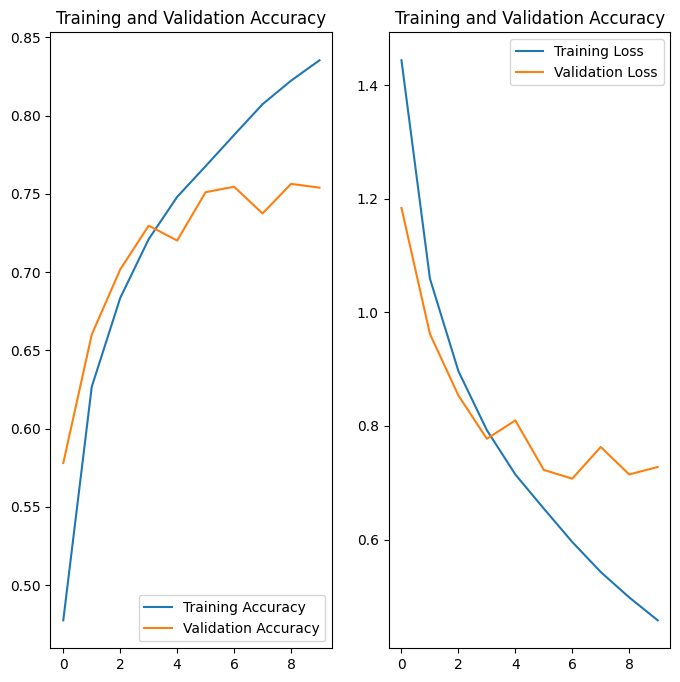

In [ ]:
#plotting the loss and accuracy curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.7277 - accuracy: 0.7540
Test Accuracy of Base Model: 0.7540000081062317


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3), input_shape = X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
optimizer = keras.optimizers.RMSprop (learning_rate = 0.0001, weight_decay= 1e-6)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
speed=21
np.random.seed(seed)
epochs=50
batch_size = 32
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9854 - accuracy: 0.2735 - val_loss: 1.7595 - val_accuracy: 0.3814
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6903 - accuracy: 0.3865 - val_loss: 1.5471 - val_accuracy: 0.4432
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5695 - accuracy: 0.4267 - val_loss: 1.4409 - val_accuracy: 0.4800
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4872 - accuracy: 0.4580 - val_loss: 1.4011 - val_accuracy: 0.5071
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4189 - accuracy: 0.4861 - val_loss: 1.3646 - val_accuracy: 0.5096
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3603 - accuracy: 0.5110 - val_loss: 1.2572 - val_accuracy: 0.5528
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3143 - accuracy: 0.5303 - val_loss: 1.2114 - val_accuracy:

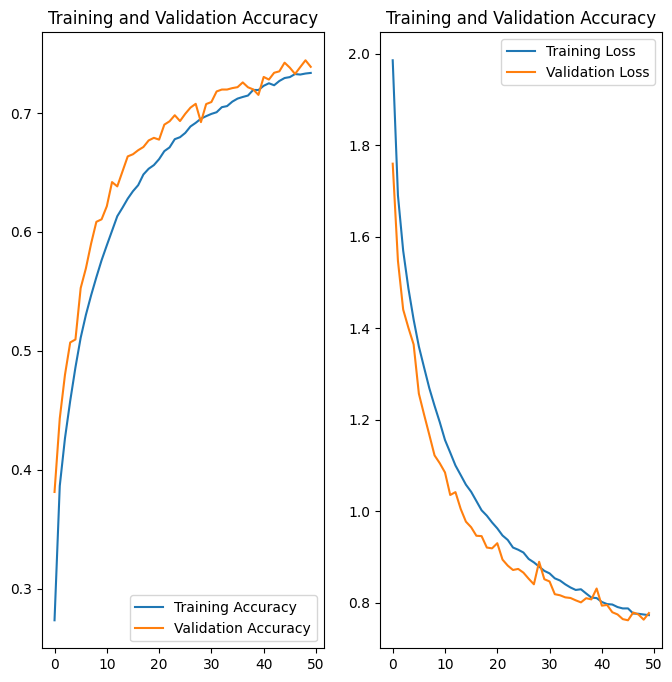

In [ ]:
#plotting the loss and accuracy curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.7778 - accuracy: 0.7388
Test Accuracy of Base Model: 0.7387999892234802


In [ ]:
#Turning the mdoel with 4 dropouts and 8 activation layers expecting better training accuracy

model_3 = Sequential([
    layers.Conv2D(32, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
model_3.compile(optimizer='adam', loss =keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/50
1563/1563 [==============================] - 19s 8ms/step - loss: 1.6638 - accuracy: 0.4166 - val_loss: 1.4157 - val_accuracy: 0.4883
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1755 - accuracy: 0.5816 - val_loss: 1.6040 - val_accuracy: 0.4334
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9878 - accuracy: 0.6554 - val_loss: 0.8833 - val_accuracy: 0.6912
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8864 - accuracy: 0.6925 - val_loss: 0.8501 - val_accuracy: 0.7091
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8219 - accuracy: 0.7161 - val_loss: 0.6618 - val_accuracy: 0.7688
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7574 - accuracy: 0.7411 - val_loss: 0.7358 - val_accuracy: 0.7459
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7203 - accuracy: 0.7524 - val_loss: 0.6512 - val_ac

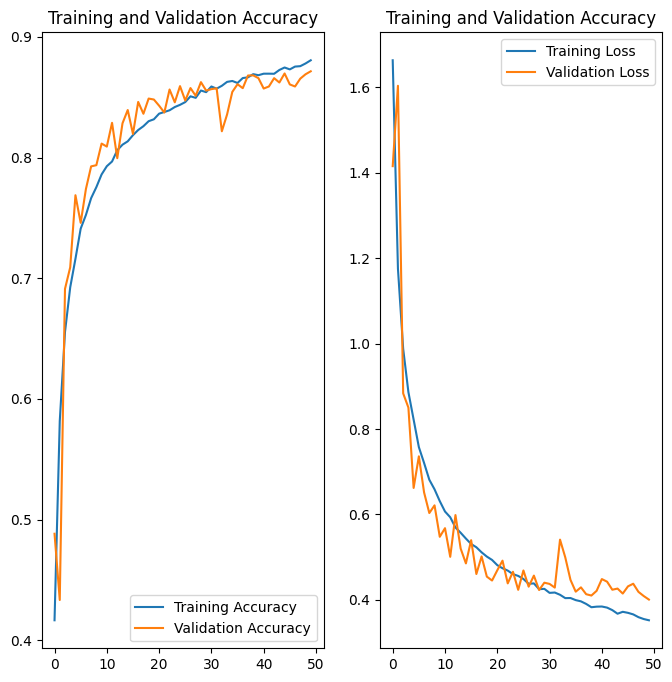

In [ ]:
#plotting the loss and accuracy curve

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model_3.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4002 - accuracy: 0.8715
Test Accuracy of Base Model: 0.8715000152587891
